In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv('ML_1.csv')
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [39]:
df.keys()

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [41]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [42]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [43]:
X= df.drop('class',axis=1)
y=df['class']

In [44]:
X.shape

(310, 6)

In [45]:
y.shape

(310,)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=5)

In [47]:
X_train.shape

(217, 6)

In [48]:
X_test.shape

(93, 6)

In [49]:
y_train.shape

(217,)

In [50]:
y_test.shape

(93,)

Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model1 = LogisticRegression()
Lrmodel=model1.fit(X_train,y_train)
yp1=model1.predict(X_test)
 

C:\Users\RANVEER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
logistic_acc=accuracy_score(y_test,yp1)
print(logistic_acc)

0.8494623655913979


In [54]:
print("Confusion matrix\n",confusion_matrix(y_test,yp1))

Confusion matrix
 [[57  3]
 [11 22]]


In [55]:
print("Classification Report\n",classification_report(y_test,yp1))

Classification Report
               precision    recall  f1-score   support

    Abnormal       0.84      0.95      0.89        60
      Normal       0.88      0.67      0.76        33

    accuracy                           0.85        93
   macro avg       0.86      0.81      0.82        93
weighted avg       0.85      0.85      0.84        93



SVM

In [56]:
from sklearn import svm

In [57]:
svm_clf = svm.SVC(kernel='linear') 
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

In [58]:
svm_acc=svm_clf.score(X_test,y_test)
print(svm_acc)

0.8494623655913979


KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
 

In [60]:
model2=KNeighborsClassifier(n_neighbors=50)
knn=model2.fit(X_train,y_train)
yp2=model2.predict(X_test)

In [61]:
knn_acc=accuracy_score(y_test,yp2)
print(knn_acc)

0.8279569892473119


In [62]:
print("Confusion matrix",confusion_matrix(y_test,yp2))

Confusion matrix [[48 12]
 [ 4 29]]


In [63]:
print("Classification Report",classification_report(y_test,yp2))

Classification Report               precision    recall  f1-score   support

    Abnormal       0.92      0.80      0.86        60
      Normal       0.71      0.88      0.78        33

    accuracy                           0.83        93
   macro avg       0.82      0.84      0.82        93
weighted avg       0.85      0.83      0.83        93



Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(criterion='entropy',max_depth=2)
dt=model3.fit(X_train,y_train)

[Text(167.4, 181.2, 'X[5] <= 20.085\nentropy = 0.892\nsamples = 217\nvalue = [150, 67]'),
 Text(83.7, 108.72, 'X[4] <= 118.066\nentropy = 0.981\nsamples = 112\nvalue = [47, 65]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.918\nsamples = 45\nvalue = [30, 15]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.817\nsamples = 67\nvalue = [17, 50]'),
 Text(251.10000000000002, 108.72, 'X[5] <= 31.25\nentropy = 0.136\nsamples = 105\nvalue = [103, 2]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.439\nsamples = 22\nvalue = [20, 2]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 83\nvalue = [83, 0]')]

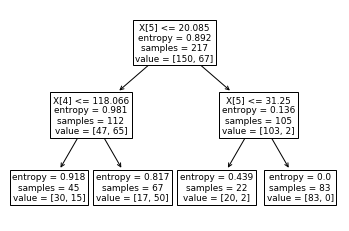

In [65]:
from sklearn import tree
tree.plot_tree(model3)

In [66]:
yp3=dt.predict(X_test)

In [67]:
dt_acc=accuracy_score(y_test,yp3)

In [68]:
print("Confusion matrix",confusion_matrix(y_test,yp3))

Confusion matrix [[50 10]
 [ 8 25]]


In [69]:
print("Classification Report\n",classification_report(y_test,yp3))

Classification Report
               precision    recall  f1-score   support

    Abnormal       0.86      0.83      0.85        60
      Normal       0.71      0.76      0.74        33

    accuracy                           0.81        93
   macro avg       0.79      0.80      0.79        93
weighted avg       0.81      0.81      0.81        93



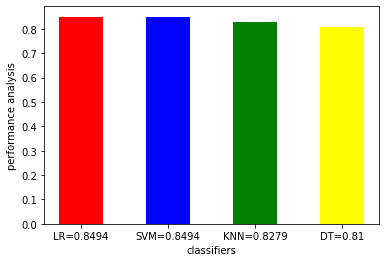

In [70]:
plt.bar([1,2,3,4],[logistic_acc,svm_acc,knn_acc,dt_acc],width=0.5,tick_label=['LR=0.8494','SVM=0.8494','KNN=0.8279','DT=0.81'],color=['red','blue','green','yellow'])
plt.xlabel('classifiers')
plt.ylabel('performance analysis')
plt.show()